# [scikit-learn](https://scikit-learn.org/) Tutorial

Cheat Sheets:
* [by DataCamp](https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116)

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Linear Regression

### Generate Data

In [2]:
n = 200
np.random.seed(42)

In [3]:
X = np.random.rand(n, 1) * 5
X[:5]

array([[1.87270059],
       [4.75357153],
       [3.65996971],
       [2.99329242],
       [0.7800932 ]])

In [4]:
X.shape

(200, 1)

In [5]:
# y = beta_1 * X + beta_0 + epsilon
beta_1 = 2.3
beta_0 = -5
y = beta_1 * X + beta_0 + np.random.normal(loc=0, scale=1.25, size=(n, 1))

#### Scatter Plot


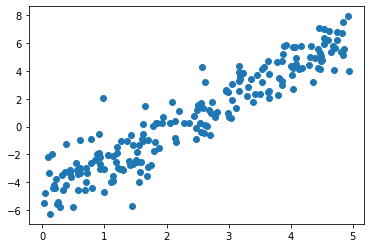

In [6]:
plt.scatter(X, y)

plt.show()

### Fit

In [7]:
reg_model = LinearRegression()

In [8]:
reg_model

LinearRegression()

In [9]:
reg_model.fit(X, y)

LinearRegression()

In [10]:
reg_model

LinearRegression()

In [11]:
reg_model.intercept_

array([-4.86849856])

In [12]:
reg_model.coef_

array([[2.28048223]])

In [13]:
y_hat = reg_model.intercept_ + reg_model.coef_ * X

In [14]:
X_dots = np.array([[0], [5]])

In [15]:
X_dots

array([[0],
       [5]])

In [16]:
y_dots = reg_model.intercept_ + reg_model.coef_ * X_dots

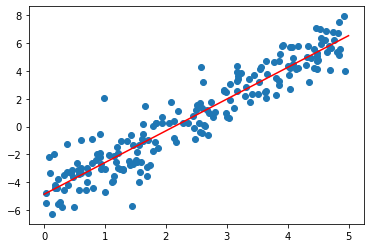

In [17]:
plt.scatter(X, y)

plt.plot(X_dots, y_dots, 'r')

plt.show()

In [18]:
y_dots = reg_model.predict(X_dots)

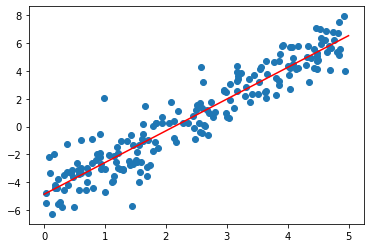

In [19]:
plt.scatter(X, y)

plt.plot(X_dots, y_dots, 'r')

plt.show()

In [20]:
y_hat = reg_model.predict(X)

In [21]:
y_hat[:5]

array([[-0.59783813],
       [ 5.97193686],
       [ 3.47799733],
       [ 1.95765162],
       [-3.08950987]])

In [22]:
((y - y_hat) ** 2).mean()

1.4591034387359054

## Polynomial Regression

### Generate Data

In [23]:
n = 200

In [24]:
np.random.seed(42)
X_pol = np.random.rand(n, 1) * 10 - 5


In [25]:
# y = beta_2 * X ** 2 + beta_1 * X + beta_0 + epsilon
beta_2 = 0.5
y_pol = beta_2 * X_pol ** 2 + beta_1 * X_pol + beta_0 + np.random.normal(loc=0, scale=2, size=(n, 1))

#### Scatter Plot


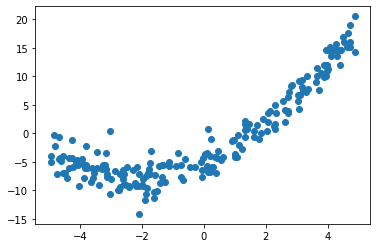

In [26]:
plt.scatter(X_pol, y_pol)

plt.show()

### Fit

In [27]:
reg_model_pol = LinearRegression()

In [28]:
reg_model_pol.fit(X_pol, y_pol)

LinearRegression()

In [29]:
X_dots_pol = np.array([[-5.5], [5.5]])
y_dots_pol = reg_model_pol.predict(X_dots_pol)

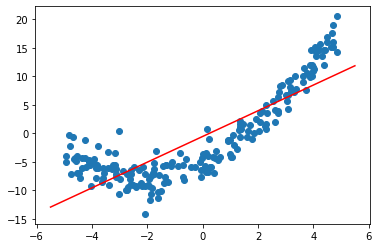

In [30]:
plt.scatter(X_pol, y_pol)

plt.plot(X_dots_pol, y_dots_pol, 'r')

plt.show()

In [31]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_pol_features = poly_features.fit_transform(X_pol)

In [32]:
X_pol[:5], X_pol_features[:5], (X_pol ** 2)[:5]

(array([[-1.25459881],
        [ 4.50714306],
        [ 2.31993942],
        [ 0.98658484],
        [-3.4398136 ]]),
 array([[-1.25459881,  1.57401818],
        [ 4.50714306, 20.3143386 ],
        [ 2.31993942,  5.3821189 ],
        [ 0.98658484,  0.97334965],
        [-3.4398136 , 11.83231757]]),
 array([[ 1.57401818],
        [20.3143386 ],
        [ 5.3821189 ],
        [ 0.97334965],
        [11.83231757]]))

In [33]:
pol_model = LinearRegression()

pol_model.fit(X_pol_features, y_pol)

LinearRegression()

In [34]:
pol_model.intercept_, pol_model.coef_

(array([-5.02680603]), array([[2.28563264, 0.51836058]]))

In [35]:
X_dots_pol = np.linspace(-5.5, 5.5, 100).reshape(100, 1)

In [36]:
X_dots_pol.shape

(100, 1)

In [37]:
X_dots_pol_features = poly_features.fit_transform(X_dots_pol)

In [38]:
X_dots_pol_features.shape

(100, 2)

In [39]:
X_dots_pol[:5], X_dots_pol_features[:5], (X_dots_pol ** 2)[:5]

(array([[-5.5       ],
        [-5.38888889],
        [-5.27777778],
        [-5.16666667],
        [-5.05555556]]),
 array([[-5.5       , 30.25      ],
        [-5.38888889, 29.04012346],
        [-5.27777778, 27.85493827],
        [-5.16666667, 26.69444444],
        [-5.05555556, 25.55864198]]),
 array([[30.25      ],
        [29.04012346],
        [27.85493827],
        [26.69444444],
        [25.55864198]]))

In [40]:
y_dots_pol = pol_model.predict(X_dots_pol_features)

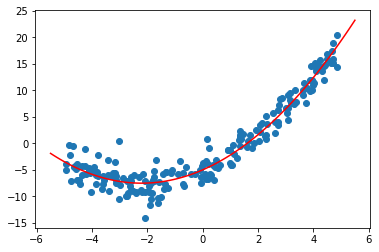

In [41]:
plt.scatter(X_pol, y_pol)

plt.plot(X_dots_pol, y_dots_pol, 'r')

plt.show()

## Train-Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_pol_features, y_pol, test_size=0.25, random_state=42)

In [43]:
X_train.shape

(150, 2)

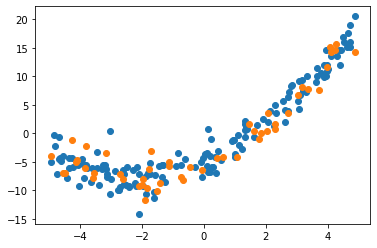

In [44]:
plt.scatter(X_train[:,0], y_train)
plt.scatter(X_test[:,0], y_test)

plt.show()

In [45]:
pol_model_split = LinearRegression()

pol_model_split.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = pol_model_split.predict(X_test)

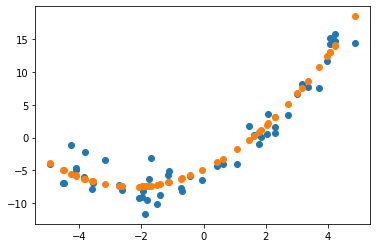

In [47]:
# plt.scatter(X_train[:,0], y_train)
plt.scatter(X_test[:,0], y_test)

plt.scatter(X_test[:,0], y_pred)

plt.show()

In [48]:
((y_test-y_pred) ** 2).mean()

3.9622867469383714

In [49]:
r2_score(y_test, y_pred)

0.929921476544427

In [50]:
mean_squared_error(y_test, y_pred)

3.9622867469383714

* [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
* [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)